In [43]:
using Plots
using DifferentialEquations

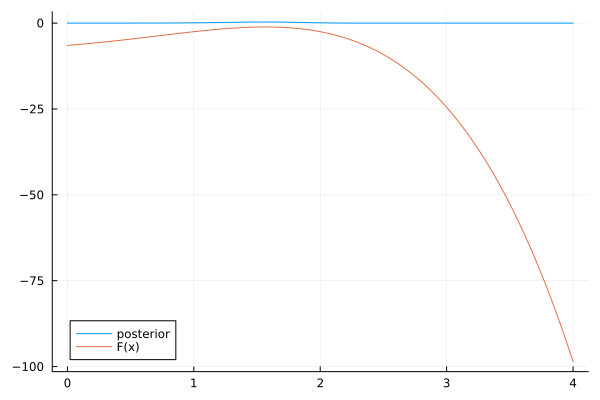

In [44]:
# Define the posterior and F(x) functions
posterior(x) = exp.(-1/2 * (x-3)^2) * exp.(-1/2 * (x^2-2)^2)

F(x) = -1/2 * (x-3)^2 - 1/2 * (x^2-2)^2

# Define the range of x values to plot
x_vals = range(0, 4, length=1000)

# Plot the posterior and F(x)
plot(x_vals, posterior.(x_vals), label="posterior")
plot!(x_vals, F.(x_vals), label="F(x)")

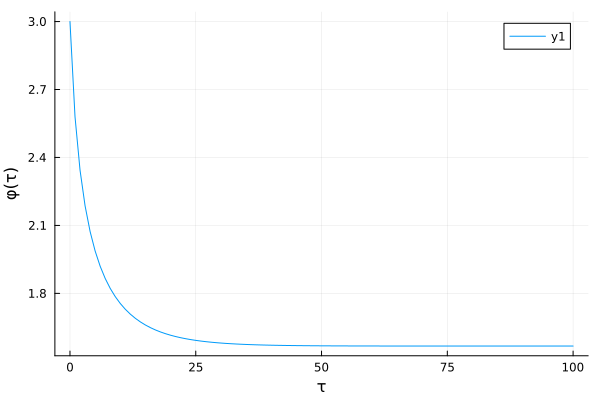

In [50]:
# Define the derivative of F with respect to phi
dF(phi) = 3 - (2*(phi^3)) + 3*phi 

# Define the step size for gradient ascent
delta = 0.01

# Set the initial value of phi to the mean of the prior distribution
phi = 3.0

# Perform gradient ascent for 100 iterations
tau_vals = collect(0:100)
phi_vals = zeros(length(tau_vals))
for i in 1:length(tau_vals)
    phi_vals[i] = phi
    phi += delta * dF(phi)
end

# Plot the value of phi as a function of time
plot(tau_vals, phi_vals, xlabel="τ", ylabel="φ(τ)")

In [51]:
phi

1.5674702253667736

In [46]:
# Define the step size for numerical integration
Δτ = 0.01

# Set the initial values of φ, εgen, and εpr
φ = 3.0
εgen = 0.0
εpr = 0.0

# Define the function to compute the derivative of the state variables
function dxdt(x, t)
    φ, εgen, εpr = x
    dg = 4*φ
    dφ = εgen * dg / (1 + dg^2) + εpr
    deps_gen = 2*(y - φ^2) - εgen
    deps_pr = μpr - φ - εpr
    return [dφ, deps_gen, deps_pr]
end

# Define the time interval for integration
tspan = (0.0, 10.0)

# Integrate the system of differential equations using Euler's method
prob = ODEProblem(dxdt, [φ, εgen, εpr], tspan)
sol = solve(prob, Euler(), dt=Δτ)

# Extract the values of φ, εgen, and εpr at each time step
τ_vals = sol.t
φ_vals = sol[1,:]
εgen_vals = sol[2,:]
εpr_vals = sol[3,:]

# Plot the results
plot(τ_vals, φ_vals, xlabel="τ", ylabel="φ(τ)", label="φ")
plot!(τ_vals, εpr_vals, xlabel="τ", ylabel="εpr(τ)", label="εpr")
plot!(τ_vals, εgen_vals, xlabel="τ", ylabel="εgen(τ)", label="εgen")

LoadError: All methods for the model function `f` had too few arguments. For example,
an ODEProblem `f` must define either `f(u,p,t)` or `f(du,u,p,t)`. This error
can be thrown if you define an ODE model for example as `f(u,t)`. The parameters
`p` are not optional in the definition of `f`! For more information on the required
number of arguments for the function you were defining, consult the documentation
for the `SciMLProblem` or `SciMLFunction` type that was being constructed.

For example, here is the no parameter Lorenz equation. The two valid versions
are out of place:

```julia
function lorenz(u,p,t)
  du1 = 10.0*(u[2]-u[1])
  du2 = u[1]*(28.0-u[3]) - u[2]
  du3 = u[1]*u[2] - 8/3*u[3]
  [du1,du2,du3]
 end
 u0 = [1.0;0.0;0.0]
 tspan = (0.0,100.0)
 prob = ODEProblem(lorenz,u0,tspan)
```

and in-place:

```julia
function lorenz!(du,u,p,t)
  du[1] = 10.0*(u[2]-u[1])
  du[2] = u[1]*(28.0-u[3]) - u[2]
  du[3] = u[1]*u[2] - 8/3*u[3]
 end
 u0 = [1.0;0.0;0.0]
 tspan = (0.0,100.0)
 prob = ODEProblem(lorenz!,u0,tspan)
```

Offending function: [31m[1mf[22m[39m
Methods:
# 1 method for generic function "dxdt":
[1] dxdt(x, t) in Main at In[46]:10


In [49]:
using HierarchicalGaussianFiltering.jl
using ActionModels

LoadError: UndefVarError: jl not defined